PM Accelerator mission: By making industry-leading tools and education available to individuals from all backgrounds, we level the playing field for future PM leaders. This is the PM Accelerator motto, as we grant aspiring and experienced PMs what they need most – Access. We introduce you to industry leaders, surround you with the right PM ecosystem, and discover the new world of AI product management skills.

In [2]:
!pip install matplotlib
!pip install seaborn
!pip install statsmodels

Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'temperature_celsius', 'temperature_fahrenheit',
       'condition_text', 'wind_mph', 'wind_kph', 'wind_degree',
       'wind_direction', 'pressure_mb', 'pressure_in', 'precip_mm',
       'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')
The correlation between temperature and latitude above the equator is: -0.3777044629600133
This indicates that temperature increases as latitude decreases (nears the equator) which is expected
The co

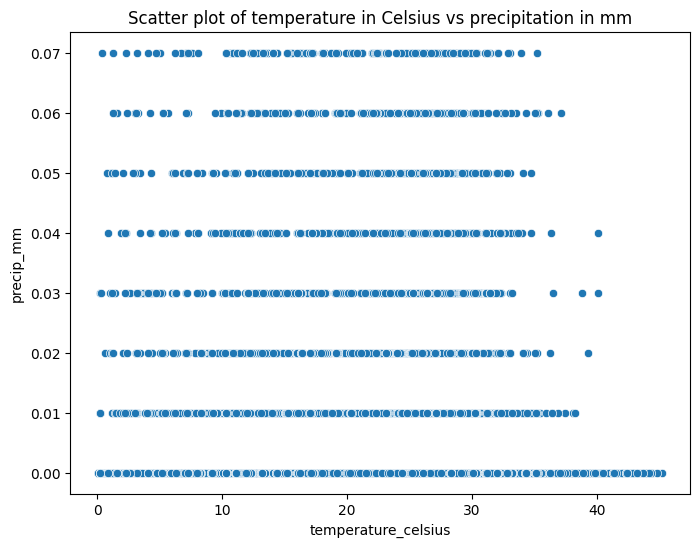

This scatter plot indicates that as the precipitation increases, the temperature range for which there is a great density of data points decreases. For example, at 0.00 precipitation the dense temperature values range from 0 to 45, whereas at 0.07 precipitation this is 10 to 32.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

df = pd.read_csv('./GlobalWeatherRepository.csv', index_col='last_updated', parse_dates=True)

# handle missing values by dropping rows
df_dropped = df.dropna()

# use interquartile method for removing outliers

df_cleaned = df_dropped.copy()
for col in df_dropped.select_dtypes(include=['number']).columns:
        Q1 = df_dropped[col].quantile(0.25)
        Q3 = df_dropped[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

print(df_cleaned.columns)
# EDA, find correlations between columns
df_lat_above = df_cleaned[df_cleaned["latitude"] >= 0]
print("The correlation between temperature and latitude above the equator is: " + str(df_lat_above["temperature_celsius"].corr(df_lat_above["latitude"])))
print("This indicates that temperature increases as latitude decreases (nears the equator) which is expected")
print("The correlation between temperature and wind speed in mph is: " + str(df_cleaned["temperature_celsius"].corr(df_cleaned["wind_mph"])))
print("The correlation between temperature and pressure in mb is: " + str(df_cleaned["temperature_celsius"].corr(df_cleaned["pressure_mb"])))
print("The correlation between temperature and precipitation in mm is: " + str(df_cleaned["temperature_celsius"].corr(df_cleaned["precip_mm"])))
print("The correlation between humidity and precipitation in mm is: " + str(df_cleaned["humidity"].corr(df_cleaned["precip_mm"])))
df_CM_air_qual_pos = df_cleaned[df_cleaned["air_quality_Carbon_Monoxide"] >= 0]
print("The correlation between temperature and Carbon Monoxide air quality is: " + str(df_CM_air_qual_pos["temperature_celsius"].corr(df_CM_air_qual_pos["air_quality_Carbon_Monoxide"])))
print("This information indicates that as temperature increases, pressure decreases, which is surprising. As precipitation increases, so does humidity, which is expected. As temperature increases, Carbon Monoxide air quality decreases, which is expected.")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_cleaned['temperature_celsius'], y=df_cleaned['precip_mm'])
plt.title('Scatter plot of temperature in Celsius vs precipitation in mm')
plt.show()
print("This scatter plot indicates that as the precipitation increases, the temperature range for which there is a great density of data points decreases. For example, at 0.00 precipitation the dense temperature values range from 0 to 45, whereas at 0.07 precipitation this is 10 to 32.")

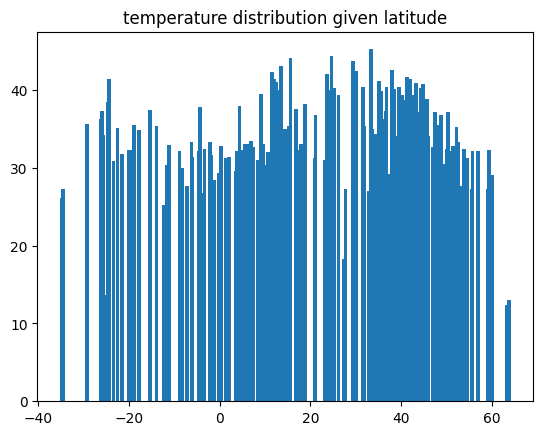

The maximum is actually around 35 degrees north due to axial tilt


In [4]:
plt.bar(df_cleaned['latitude'],df_cleaned['temperature_celsius'])
plt.title("temperature distribution given latitude")
plt.show()
print("The maximum is actually around 35 degrees north due to axial tilt")

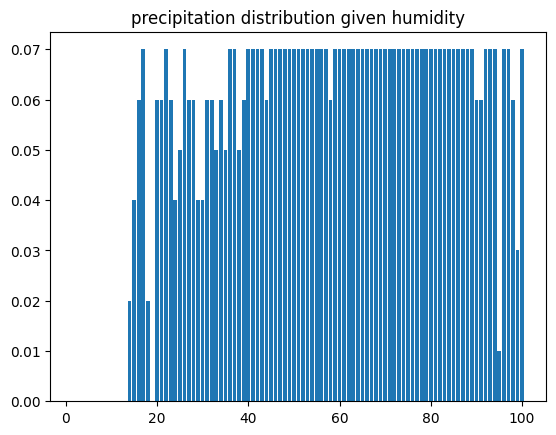

Precipitation increases with humidity


In [5]:
plt.bar(df_cleaned['humidity'],df_cleaned['precip_mm'])
plt.title("precipitation distribution given humidity")
plt.show()
print("Precipitation increases with humidity")

In [6]:
# Split data into training and testing
train_data = df_cleaned[:-12046]
test_data = df_cleaned[-12046:]

# Define and fit the ARIMA model
model = ARIMA(train_data['temperature_celsius'], order=(5, 1, 0))
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=len(train_data), end=len(df_cleaned)-1)

# Evaluate the model
rmse = sqrt(mean_squared_error(test_data['temperature_celsius'], predictions))
mae = mean_absolute_error(test_data['temperature_celsius'], predictions)
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

/Users/deusexmachina/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/deusexmachina/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/deusexmachina/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/deusexmachina/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecas

RMSE: 9.015394134633288
MAE: 6.699250035618072


/Users/deusexmachina/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/deusexmachina/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Given that these errors are in the unit of the dependent variable which is temperature, the model's predictions are not bad.